In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('../data/sales_train.csv')
test = pd.read_csv('../data/sales_test.csv')

calendar = pd.read_csv('../data/calendar.csv')
inventory = pd.read_csv('../data/inventory.csv')
solution = pd.read_csv('../data/solution.csv')
weights = pd.read_csv('../data/test_weights.csv')

files = {
    "train": train,
    "test": test,
    "calendar": calendar,
    "inventory": inventory,
    "solution": solution,
    "weights": weights
}

### data 총정리

#### 파일
|  | sales_train.csv | sales_test.csv | inventory.csv | calendar.csv | test_weights.csv |
|---------------------------------------|-----------------|----------------|---------------|--------------|------------------|
| unique_id | O | O | O | X | O |
| date | O | O | X | O | X |
| warehouse | O | O | O | O | X |
| total_orders | O | O | X | X | X |
| sales(목표값) | O | X | X | X | X |
| sell_price_main | O | O | X | X | X |
| availability | O | X | X | X | X |
| type_0_discount, type_1_discount, … | O | O | X | X | X |
| product_unique_id | X | X | O | X | X |
| name | X | X | O | X | X |
| L1_category_name, L2_category_name, … | X | X | O | X | X |
| holiday_name | X | X | X | O | X |
| holiday | X | X | X | O | X |
| shops_closed | X | X | X | O | X |
| winter_school_holidays | X | X | X | O | X |
| school_holidays | X | X | X | O | X |
| weight | X | X | X | X | O |



------------
sales_train, sales_test - 
inventory - 제품의 재고와 같은 추가 정보 존재
calendar - 휴일 및 창고별 이벤트가 추가로 포함된 데이터셋
test_weights




In [2]:
for name, file in files.items():
    try:
        print(f"{name}의 unique_id의 갯수: {file['unique_id'].nunique()}개")
    except:
        print(f"{name}에는 unique_id 열이 없습니다.")

train의 unique_id의 갯수: 5390개
test의 unique_id의 갯수: 3625개
calendar에는 unique_id 열이 없습니다.
inventory의 unique_id의 갯수: 5432개
solution에는 unique_id 열이 없습니다.
weights의 unique_id의 갯수: 5390개


## sales_train data

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4007419 entries, 0 to 4007418
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   unique_id        int64  
 1   date             object 
 2   warehouse        object 
 3   total_orders     float64
 4   sales            float64
 5   sell_price_main  float64
 6   availability     float64
 7   type_0_discount  float64
 8   type_1_discount  float64
 9   type_2_discount  float64
 10  type_3_discount  float64
 11  type_4_discount  float64
 12  type_5_discount  float64
 13  type_6_discount  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 428.0+ MB


In [4]:
train.head()

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
0,4845,2024-03-10,Budapest_1,6436.0,16.34,646.26,1.00,0.00000,0.0,0.0,0.0,0.15312,0.0,0.0
1,4845,2021-05-25,Budapest_1,4663.0,12.63,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0
2,4845,2021-12-20,Budapest_1,6507.0,34.55,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0
3,4845,2023-04-29,Budapest_1,5463.0,34.52,646.26,0.96,0.20024,0.0,0.0,0.0,0.15312,0.0,0.0
4,4845,2022-04-01,Budapest_1,5997.0,35.92,486.41,1.00,0.00000,0.0,0.0,0.0,0.15649,0.0,0.0


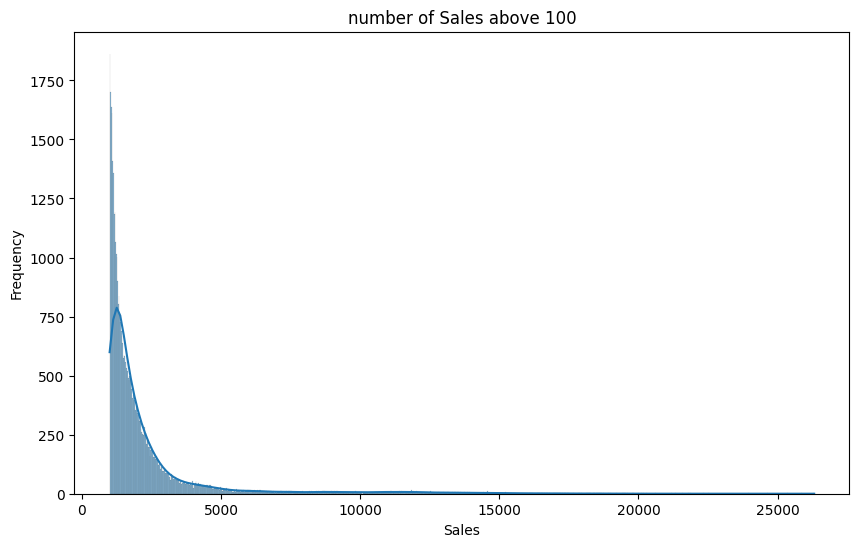

1000 이하 갯수: 45043
null 갯수: 52


In [5]:
sales_1000 = train[train['sales'] > 1000]['sales'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(sales_1000, bins=1000, kde=True)
plt.title('number of Sales above 100')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

zero_count = train[train['sales'] >= 1000].shape[0]
print(f"1000 이하 갯수: {zero_count}")
sales_null_count = train['sales'].isnull().sum()
print(f"null 갯수: {sales_null_count}")

## solution

In [6]:
solution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47021 entries, 0 to 47020
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         47021 non-null  object
 1   sales_hat  47021 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 734.8+ KB


In [7]:
solution.sample(n=10)

,id,sales_hat
8388,1943_2024-06-09,0
25786,784_2024-06-10,0
3182,2985_2024-06-09,0
14022,4329_2024-06-11,0
42003,1549_2024-06-05,0
8261,3116_2024-06-07,0
40383,228_2024-06-06,0
46756,4532_2024-06-11,0
18566,2922_2024-06-04,0
21096,4543_2024-06-09,0


## calendar data

In [8]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23016 entries, 0 to 23015
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    23016 non-null  object
 1   holiday_name            930 non-null    object
 2   holiday                 23016 non-null  int64 
 3   shops_closed            23016 non-null  int64 
 4   winter_school_holidays  23016 non-null  int64 
 5   school_holidays         23016 non-null  int64 
 6   warehouse               23016 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.2+ MB


In [9]:
cal_lists =calendar.columns.tolist()

for list in cal_lists:
    print(f'{list} : {calendar[list].nunique()} \n{calendar[list].unique()}\n')



date : 3288 
['2022-03-16' '2020-03-22' '2018-02-07' ... '2017-01-23' '2023-10-20'
 '2022-05-02']

holiday_name : 37 
[nan 'Den boje za svobodu a demokracii' 'Good Friday' 'Easter Monday'
 '2nd Christmas Day' 'Cyrila a Metodej' 'International womens day'
 'Den ceske statnosti' 'Den osvobozeni' 'New Years Day' 'Whit sunday'
 'Memorial Day of the Republic' 'Independent Hungary Day' 'Labour Day'
 'Memorial Day for the Victims of the Holocaust' 'Reformation Day'
 'Den vzniku samostatneho ceskoslovenskeho statu' 'Ascension day'
 'Corpus Christi' 'Jan Hus' 'Assumption of the Virgin Mary' 'Epiphany'
 'Christmas Eve' 'Memorial day of the 1956 Revolution'
 'Memorial Day for the Martyrs of Arad' 'Day of National Unity'
 '1st Christmas Day' 'Whit monday' 'German Unity Day'
 'State Foundation Day' 'All Saints Day' 'Hungary National Day Holiday'
 'Christmas Holiday'
 'Memorial Day for the Victims of the Communist Dictatorships'
 'Peace Festival in Augsburg' 'National Defense Day'
 '1848 Revolution 

In [10]:
calendar.sample(10)

,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,warehouse
11909,2022-10-18,NaN,0,0,0,0,Munich_1
20718,2017-06-12,NaN,0,0,0,0,Budapest_1
11346,2020-01-04,NaN,0,0,0,0,Prague_2
12156,2019-01-11,NaN,0,0,0,0,Prague_2
21350,2023-05-25,NaN,0,0,0,0,Prague_2
7998,2017-11-22,NaN,0,0,0,0,Frankfurt_1
671,2018-01-07,NaN,0,0,0,0,Brno_1
22417,2021-04-02,Good Friday,1,1,0,0,Munich_1
813,2017-03-07,NaN,0,0,0,0,Prague_2
10538,2021-02-05,NaN,0,0,0,0,Prague_1


## inventory

In [11]:
inventory.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5432 entries, 0 to 5431
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   unique_id            5432 non-null   int64 
 1   product_unique_id    5432 non-null   int64 
 2   name                 5432 non-null   object
 3   L1_category_name_en  5432 non-null   object
 4   L2_category_name_en  5432 non-null   object
 5   L3_category_name_en  5432 non-null   object
 6   L4_category_name_en  5432 non-null   object
 7   warehouse            5432 non-null   object
dtypes: int64(2), object(6)
memory usage: 339.6+ KB


In [12]:
inv_lists =inventory.columns.tolist()

for list in inv_lists:
    print(f'{list} : {inventory[list].nunique()} \n{inventory[list].unique()}\n')



unique_id : 5432 
[5255 4948 2146 ... 5226 5390  860]

product_unique_id : 2670 
[2583 2426 1079 ... 1849 2649  447]

name : 2670 
['Pastry_196' 'Herb_19' 'Beet_2' ... 'Bread_147' 'Orange_32' 'Turkey_4']

L1_category_name_en : 3 
['Bakery' 'Fruit and vegetable' 'Meat and fish']

L2_category_name_en : 47 
['Bakery_L2_14' 'Fruit and vegetable_L2_30' 'Fruit and vegetable_L2_3'
 'Meat and fish_L2_13' 'Fruit and vegetable_L2_17' 'Bakery_L2_18'
 'Meat and fish_L2_25' 'Fruit and vegetable_L2_1'
 'Fruit and vegetable_L2_0' 'Bakery_L2_9' 'Bakery_L2_8' 'Bakery_L2_28'
 'Meat and fish_L2_27' 'Bakery_L2_7' 'Bakery_L2_29'
 'Fruit and vegetable_L2_12' 'Fruit and vegetable_L2_2' 'Bakery_L2_22'
 'Fruit and vegetable_L2_4' 'Bakery_L2_5' 'Fruit and vegetable_L2_6'
 'Bakery_L2_35' 'Meat and fish_L2_23' 'Fruit and vegetable_L2_16'
 'Meat and fish_L2_38' 'Meat and fish_L2_26' 'Meat and fish_L2_20'
 'Bakery_L2_10' 'Fruit and vegetable_L2_37' 'Meat and fish_L2_15'
 'Fruit and vegetable_L2_19' 'Fruit and veget

In [13]:
inventory.sample(10)

,unique_id,product_unique_id,name,L1_category_name_en,L2_category_name_en,L3_category_name_en,L4_category_name_en,warehouse
5,4119,2024,Donut_32,Bakery,Bakery_L2_18,Bakery_L3_77,Bakery_L4_1,Budapest_1
858,177,83,Pastry_6,Bakery,Bakery_L2_14,Bakery_L3_50,Bakery_L4_1,Prague_2
2169,1402,713,Apricot_3,Fruit and vegetable,Fruit and vegetable_L2_0,Fruit and vegetable_L3_0,Fruit and vegetable_L4_14,Budapest_1
3751,444,229,Baguette_5,Bakery,Bakery_L2_7,Bakery_L3_90,Bakery_L4_1,Brno_1
291,1272,649,Onion_12,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_63,Fruit and vegetable_L4_18,Prague_3
2587,3871,1903,Avocado_7,Fruit and vegetable,Fruit and vegetable_L2_1,Fruit and vegetable_L3_39,Fruit and vegetable_L4_10,Prague_1
1241,2100,1058,Roll_18,Bakery,Bakery_L2_8,Bakery_L3_41,Bakery_L4_1,Munich_1
1683,2750,1361,Grape_21,Fruit and vegetable,Fruit and vegetable_L2_1,Fruit and vegetable_L3_12,Fruit and vegetable_L4_1,Prague_3
4159,3845,1890,Berry_6,Fruit and vegetable,Fruit and vegetable_L2_1,Fruit and vegetable_L3_1,Fruit and vegetable_L4_1,Munich_1
1196,5238,2575,Chicken_99,Meat and fish,Meat and fish_L2_13,Meat and fish_L3_43,Meat and fish_L4_44,Prague_2


## 전체 merge 시

In [20]:
merged_train = train.merge(calendar,on=['warehouse','date'],how='left') 
merged_train = merged_train.merge(inventory,on=['warehouse','unique_id'],how='left')

merged_test = test.merge(calendar,on=['warehouse','date'],how='left')
merged_test = merged_test.merge(inventory,on=['warehouse','unique_id'],how='left')

merged_train = merged_train.dropna(subset=['sales']) # Null in Target

merged_train.drop('availability', axis=1, inplace=True) # Not Available in Test
merged_train.drop('name', axis=1, inplace=True) # Creating Problem in Training
merged_test.drop('name', axis=1, inplace=True) 

def date(df):
    
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['day'] = df['date'].dt.day
    df['month'] = df['date'].dt.month
    df['month_name'] = df['date'].dt.month_name()
    df['day_of_week'] = df['date'].dt.day_name()
    df['week'] = df['date'].dt.isocalendar().week
    df['year_sin'] = np.sin(2 * np.pi * df['year'])
    df['year_cos'] = np.cos(2 * np.pi * df['year'])
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12) 
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)  
    df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)
    df['group'] = (df['year'] - 2020) * 48 + df['month'] * 4 + df['day'] // 7
    
    df.drop('date', axis=1, inplace=True)
    
    cols = ['warehouse', 'month_name', 'day_of_week','holiday_name','L1_category_name_en',
             'L2_category_name_en','L3_category_name_en','L4_category_name_en']
    df['holiday_name'] = df['holiday_name'].fillna('None')
    for c in cols:
        df[c] = df[c].astype('category')

    return df


merged_train = date(merged_train)
merged_test = date(merged_test)

In [21]:
merged_train.head().transpose()

,0,1,2,3,4
unique_id,4845,4845,4845,4845,4845
warehouse,Budapest_1,Budapest_1,Budapest_1,Budapest_1,Budapest_1
total_orders,6436.0,4663.0,6507.0,5463.0,5997.0
sales,16.34,12.63,34.55,34.52,35.92
sell_price_main,646.26,455.96,455.96,646.26,486.41
type_0_discount,0.0,0.0,0.0,0.20024,0.0
type_1_discount,0.0,0.0,0.0,0.0,0.0
type_2_discount,0.0,0.0,0.0,0.0,0.0
type_3_discount,0.0,0.0,0.0,0.0,0.0
type_4_discount,0.15312,0.15025,0.15025,0.15312,0.15649
